In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data_brut = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X = data_brut[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut = data_brut[[9]]
data_brut.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


In [2]:
#X.describe()

In [3]:
y_transform = y_brut
#y_transform.replace('o', -1)
#y_transform.replace('n', 1)
y_transform = np.where(y_transform=='o',-1,1)
#y_transform

In [4]:
y_outliers = data_brut[data_brut[9] == "o"]
len(y_outliers)

878

In [5]:
y_transform_outliers = y_transform[y_transform == -1]
len(y_transform_outliers)

878

In [6]:
y_normals = data_brut[data_brut[9] == "n"]
len(y_normals)

45586

In [7]:
y_transform_normals = y_transform[y_transform == 1]
len(y_transform_normals)

45586

In [8]:
len(y_outliers) + len(y_normals)

46464

In [9]:
len(y_transform_outliers) + len(y_transform_normals)

46464

In [10]:
#RandomizedSearchCV took 5910.42 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.001 (std: 0.002)
#Parameters: {'p': 9, 'novelty': True, 'n_neighbors': 4, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 21, 'contamination': 0.14847100000000002, 'algorithm': 'auto'}

#Model with rank: 2
#Mean validation score: 0.001 (std: 0.002)
#Parameters: {'p': 5, 'novelty': True, 'n_neighbors': 3, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 41, 'contamination': 0.13542500000000002, 'algorithm': 'auto'}

#Model with rank: 3
#Mean validation score: 0.000 (std: 0.000)
#Parameters: {'p': 2, 'novelty': True, 'n_neighbors': 15, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 7, 'contamination': 0.21387499999999998, 'algorithm': 'auto'}

#Parameters: {'p': 7, 'novelty': True, 'n_neighbors': 7, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 97, 'contamination': 0.03540998689724445, 'algorithm': 'auto'}

#RandomizedSearchCV took 10668.68 seconds for 30 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.001 (std: 0.003)
#Parameters: {'p': 6, 'novelty': True, 'n_neighbors': 7, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 93, 'contamination': 0.101012, 'algorithm': 'auto'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.000)
#Parameters: {'p': 4, 'novelty': True, 'n_neighbors': 6, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 52, 'contamination': 0.42032400000000003, 'algorithm': 'auto'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.000)
#Parameters: {'p': 9, 'novelty': True, 'n_neighbors': 17, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 11, 'contamination': 0.26319000000000004, 'algorithm': 'auto'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.000)
#Parameters: {'p': 6, 'novelty': True, 'n_neighbors': 7, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 95, 'contamination': 0.485444, 'algorithm': 'auto'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.000)
#Parameters: {'p': 9, 'novelty': True, 'n_neighbors': 8, 'n_jobs': None, 'metric': 'minkowski', 'leaf_size': 38, 'contamination': 0.47909, 'algorithm': 'auto'}

from sklearn.neighbors import LocalOutlierFactor
algorithm='auto'
contamination=0.42032400000000003
leaf_size=52
metric='minkowski'
n_jobs=None
n_neighbors=6
novelty=True
p=4
#clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
func = LocalOutlierFactor(algorithm=algorithm, contamination=contamination, leaf_size=leaf_size, 
                         metric=metric, n_jobs=n_jobs, n_neighbors=n_neighbors, novelty=novelty, p=p)

In [11]:
from time import time
start = time()

func.fit(X)
y_pred = func.predict(X)
#y_pred

print("LOF took %.2f seconds"
      " parameter settings." % ((time() - start)))

LOF took 55.34 seconds parameter settings.


In [12]:
X_scores = func.negative_outlier_factor_
X_scores

array([-1.07874369, -0.98119874, -1.08358734, ..., -1.15771778,
       -0.9515153 , -1.09356161])

In [13]:
#y_scores = func.decision_function(X)
#y_scores

In [44]:
from sklearn.utils.validation import column_or_1d
y_transform_1d = column_or_1d(y_transform, warn=True)
y_transform_1d

/Users/thesard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([-1, -1, -1, ...,  1,  1,  1])

In [45]:
from sklearn.model_selection import cross_val_predict
y_scores_cross_validation = cross_val_predict(func, X, y_transform_1d, cv=3,method="decision_function")
y_scores_cross_validation

AttributeError: 'LocalOutlierFactor' object has no attribute 'classes_'

In [16]:
#   TP  FN
#   FP  TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_transform, y_pred)

array([[  418,   460],
       [14674, 30912]])

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_transform, y_pred)

0.9853372434017595

In [18]:
recall_score(y_transform, y_pred)

0.6781029263370333

In [19]:
from sklearn.metrics import f1_score
f1_score(y_transform, y_pred)

0.8033472803347281

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_transform, y_pred)

In [21]:
precisions

array([0.98110365, 0.98533724, 1.        ])

In [22]:
recalls

array([1.        , 0.67810293, 0.        ])

In [23]:
thresholds

array([-1,  1])

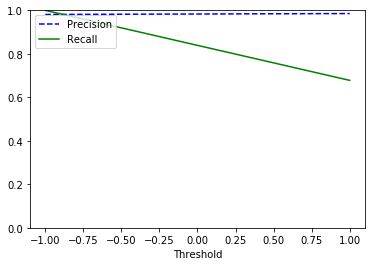

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_transform, y_pred)

In [26]:
fpr

array([0.      , 0.523918, 1.      ])

In [27]:
tpr

array([0.        , 0.67810293, 1.        ])

In [28]:
thresholds

array([ 2,  1, -1])

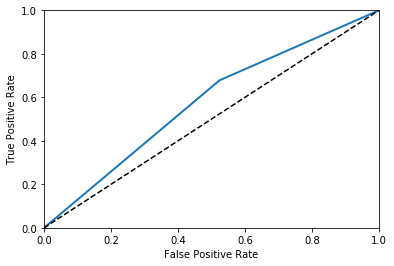

In [29]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_transform, y_pred)

0.5770924654464209

In [31]:
X_outliers = data_brut[y_pred == -1]
#X_outliers
len(X_outliers)

15092

In [32]:
X_normals = data_brut[y_pred == 1]
#X_normals
len(X_normals)

31372

In [33]:
len(X_normals) + len(X_outliers)

46464

In [34]:
FP = X_normals[X_normals[9] == "o"]
len(FP)

460

In [35]:
VP = X_normals[X_normals[9] == "n"]
len(VP)

30912

In [36]:
VN = X_outliers[X_outliers[9] == "o"]
len(VN)

418

In [37]:
FN = X_outliers[X_outliers[9] == "n"]
len(FN)

14674

In [38]:
precision_O = len(VN)/(len(FN) + len(VN))
precision_O

0.027696793002915453

In [39]:
precision_N = len(VP)/(len(VP) + len(FP))
precision_N

0.9853372434017595

In [40]:
rappel_O = len(VN)/(len(FP) + len(VN))
rappel_O

0.4760820045558087

In [41]:
rappel_N = len(VP)/(len(VP) + len(FN))
rappel_N

0.6781029263370333